In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
sales_raw = pd.read_csv('./data/kc_house_data.csv')
sales_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

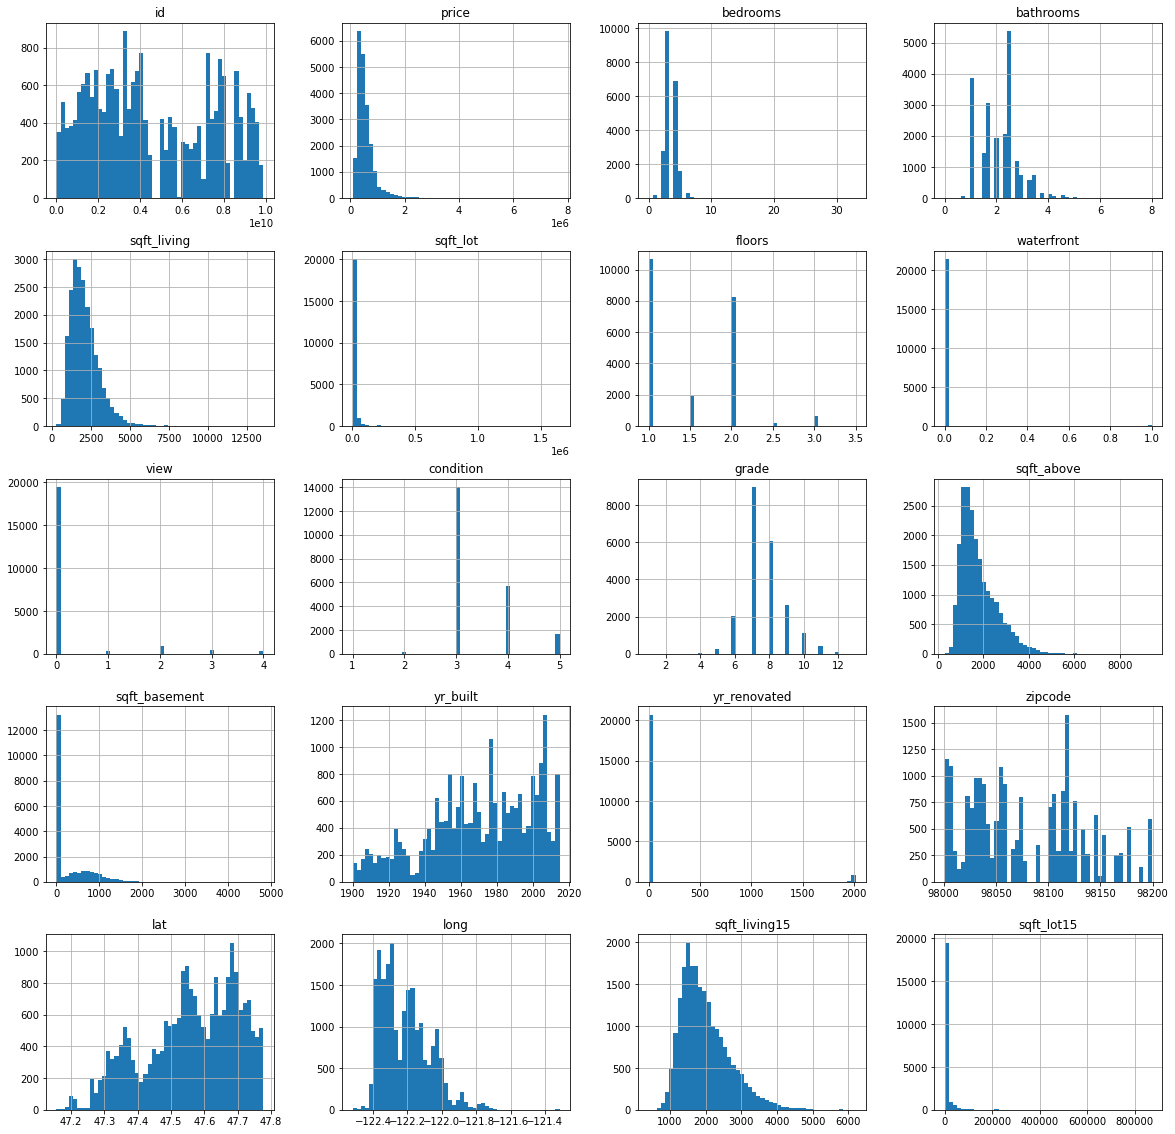

In [6]:
sales_raw.hist(bins=50, figsize=(20,20));

In [17]:
X, y = sales_raw.drop('price', axis=1), sales_raw['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [19]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1571,934300140,20150323T000000,4,1.50,2000,6778,1.0,0,0,4,7,1170,830,1962,0,98198,47.3708,-122.311,1940,7531
16330,9238430680,20140521T000000,4,2.50,2630,48706,2.0,0,0,3,8,2630,0,1986,0,98072,47.7750,-122.125,2680,48706
12786,191100870,20140805T000000,4,2.50,2620,9525,2.5,0,0,4,9,2620,0,1974,0,98040,47.5631,-122.219,2580,9525
12524,2025701530,20140826T000000,3,2.50,1610,6000,2.0,0,0,4,7,1610,0,1993,0,98038,47.3490,-122.036,1570,6000
16179,4059400585,20140624T000000,3,1.00,880,18205,1.0,0,0,4,6,880,0,1945,0,98178,47.5013,-122.244,1110,16115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7855801670,20150401T000000,4,3.25,5180,19850,2.0,0,3,3,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
866,3955900830,20150427T000000,3,2.50,3460,6590,2.0,0,0,3,7,3460,0,2001,0,98056,47.4802,-122.188,2490,6312
74,3444100400,20150316T000000,3,1.75,1790,50529,1.0,0,0,5,7,1090,700,1965,0,98042,47.3511,-122.073,1940,50529
14512,6933600540,20140820T000000,2,1.00,820,5040,1.0,0,0,3,7,820,0,1953,0,98199,47.6498,-122.388,1730,5760


In [20]:
correlations = sales_raw.corr()
correlations['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [23]:
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
def select_test(X):
    return X

select_tester = FunctionTransformer(select_test)

In [35]:
def to_yr_sold(date):
    return pd.to_datetime(date).dt.year

date_transformer = FunctionTransformer(to_yr_sold)

date_transformer.fit_transform(X_train['date'])

1571     2015
16330    2014
12786    2014
12524    2014
16179    2014
         ... 
153      2015
866      2015
74       2015
14512    2014
338      2014
Name: date, Length: 17290, dtype: int64

In [51]:
class DateAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        yr_sold = date_transformer.fit_transform(X['date'])
        return np.c_[X, yr_sold]
    
DateAdder().fit_transform(X_train)

array([[934300140, '20150323T000000', 4, ..., 1940, 7531, 2015],
       [9238430680, '20140521T000000', 4, ..., 2680, 48706, 2014],
       [191100870, '20140805T000000', 4, ..., 2580, 9525, 2014],
       ...,
       [3444100400, '20150316T000000', 3, ..., 1940, 50529, 2015],
       [6933600540, '20140820T000000', 2, ..., 1730, 5760, 2014],
       [405100295, '20140826T000000', 3, ..., 1740, 8000, 2014]],
      dtype=object)

In [87]:
# column indices
bedrooms_idx, sqft_living_idx, yr_sold_idx, yr_built_idx, yr_renovated_idx = 2, 4, -1, 13, 14

# add attributes, a custom sklearn transformer needs init, fit, and transform methods
# fit_transform is created by adding TransformerMixin and BaseEstimator gives get/
# set_params()
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_sqft = True):
        self.add_bedrooms_per_sqft = add_bedrooms_per_sqft
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Subtract the larger of yr_built or yr_renovated from yr_sold,
        # if this is negative (yr_reno after yr_sold) return 0
        effective_age_guess = X[:, yr_sold_idx] - np.maximum(X[:, yr_renovated_idx], X[:, yr_built_idx])
        effective_age = np.maximum(effective_age_guess, 0)
        if self.add_bedrooms_per_sqft:
            bedrooms_per_sqft = X[:, bedrooms_idx] / X[:, sqft_living_idx]
            return np.c_[X, effective_age, bedrooms_per_sqft]
        else:
            return np.c_[X, effective_age]
        
def drop_columns(X):
    # drop id, date, yr_renovated, zipcode
    return X[:,[*range(2, 14), *range(16, 21)]]



In [88]:
date_pipe = Pipeline([
    ('yr_sold_adder', DateAdder()),
    ('feature_adder', FeatureAdder()),
    ('column_dropper', FunctionTransformer(drop_columns)),
    
])

# preprocess_pipe = ColumnTransformer([
#     ('date_fixer', date_pipe, make_column_selector(pattern='date'))
# ])

test_res = date_pipe.fit_transform(X_train)

In [89]:
X_train.iloc[0, :]

id                     934300140
date             20150323T000000
bedrooms                       4
bathrooms                    1.5
sqft_living                 2000
sqft_lot                    6778
floors                         1
waterfront                     0
view                           0
condition                      4
grade                          7
sqft_above                  1170
sqft_basement                830
yr_built                    1962
yr_renovated                   0
zipcode                    98198
lat                      47.3708
long                    -122.311
sqft_living15               1940
sqft_lot15                  7531
Name: 1571, dtype: object

In [92]:
test_res[0]

array([4, 1.5, 2000, 6778, 1.0, 0, 0, 4, 7, 1170, 830, 1962, 47.3708,
       -122.311, 1940, 7531, 2015], dtype=object)

In [113]:
# all except waterfront for now
num_indices = [x for x in range(0, 17) if x != 5]


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



ct = ColumnTransformer([
    ('num', num_pipeline, num_indices),
    ], remainder='passthrough')

prepared = ct.fit_transform(test_res)
prepared[0]

array([0.6730471423952884, -0.8007714664832806, -0.08588714216589924,
       -0.20073274134337576, -0.9143860398782998, -0.3010692883979992,
       0.9151081242170503, -0.5565317101913227, -0.7440722110356905,
       1.22528542266535, -0.3080052274212016, -1.3629475554112465,
       -0.6931190338110651, -0.06540857614666841, -0.1918527997412983,
       1.4410109144332455, 0], dtype=object)

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(prepared, y_train)

LinearRegression()

In [115]:
lin_predictions = lin_reg.predict(prepared)
lin_predictions

array([342605.36250319, 722162.47627153, 779778.19197691, ...,
       324377.67766248, 330434.60033028, 490390.3012373 ])

In [117]:
lin_rmse = mean_squared_error(y_train, lin_predictions, squared=False)
lin_rmse

204535.54518147133

In [118]:
lin_mae = mean_absolute_error(y_train, lin_predictions)
lin_mae

126442.19811932159

In [119]:
tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(prepared, y_train)

DecisionTreeRegressor(random_state=13)

In [120]:
tree_predictions = tree_reg.predict(prepared)
tree_predictions

array([284950., 625000., 838400., ..., 349000., 508000., 265000.])

In [121]:
tree_rmse = mean_squared_error(y_train, tree_predictions, squared=False)
tree_rmse

3444.313096687119

In [122]:
tree_mae = mean_absolute_error(y_train, tree_predictions)
tree_mae

144.40306535569692

In [127]:
neg_tree_scores = cross_val_score(tree_reg, prepared, y_train,
                        scoring='neg_mean_absolute_error', cv=10)
tree_scores = -neg_tree_scores
print(tree_scores)
print(tree_scores.mean())
print(tree_scores.std())


[104574.85020243  97448.21399653 102265.49392713 102256.65760555
 107695.72498554  98280.80913823  97342.21659919 100058.18565645
 102235.64314633 104162.54135338]
101632.03366107575
3203.160049087805


In [128]:
neg_lin_scores = cross_val_score(lin_reg, prepared, y_train,
                        scoring='neg_mean_absolute_error', cv=10)
lin_scores = -neg_lin_scores
print(lin_scores)
print(lin_scores.mean())
print(lin_scores.std())

[134096.44149524 128730.44098589 126492.44674793 126981.6983099
 126752.39106044 123727.73717681 122509.69503439 128638.188556
 127176.73387114 121609.02517024]
126671.47984079653
3394.7305825794383


In [130]:
forest_reg = RandomForestRegressor(random_state=13)
forest_reg.fit(prepared, y_train)
forest_predictions = forest_reg.predict(prepared)
forest_predictions

array([284189.5 , 616350.61, 871325.4 , ..., 354775.66, 501897.5 ,
       297418.  ])

In [131]:
neg_forest_scores = cross_val_score(forest_reg, prepared, y_train,
                               scoring='neg_mean_absolute_error', cv=10)

forest_scores = -neg_forest_scores
print(forest_scores)
print(forest_scores.mean())
print(forest_scores.std())

[74229.88479085 66882.48373447 71690.09804463 70135.44011116
 72357.7717413  67436.26301424 66022.3871269  70524.62898755
 69563.01899598 71152.84802294]
69999.4824570024
2454.263461332978


### Testing A Quick Hunch: Large Errors are Skewing the Overall Results
(This looks to be the case, as the median absolute errors are much smaller than the mean absolute errors, and the variance in these scores is also much smaller)

In [132]:
neg_forest_scores = cross_val_score(forest_reg, prepared, y_train,
                               scoring='neg_median_absolute_error', cv=10)

forest_scores = -neg_forest_scores
print(forest_scores)
print(forest_scores.mean())
print(forest_scores.std())

[39803.5  36768.01 39536.09 38963.2  39442.07 40027.41 39114.91 39224.55
 39872.   37862.7 ]
39061.444
961.60512584116
